# Libraries

In [34]:
import tensorflow as tf 
# Importing TensorFlow library for deep learning tasks.
from tensorflow.keras import Sequential  
# Importing Sequential model for building deep learning models.
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Dropout 
# Importing various layers for constructing neural networks.
from tensorflow.keras.optimizers import Adam  
#Importing Adam optimizer for model optimization.
from tensorflow.keras.preprocessing import image  
# Importing image preprocessing utilities from Keras.
import numpy as np  
# Importing NumPy for numerical computing.
import pandas as pd 
# Importing Pandas for data manipulation and analysis.
import matplotlib.pyplot as plt  
# Importing Matplotlib for data visualization.
from sklearn.model_selection import train_test_split  
# Importing train_test_split function for splitting data into training and testing sets.
from tqdm import tqdm 
# Importing tqdm for progress visualization during iterations.

# Data Set

In [5]:
data = pd.read_csv('D:/PythonProj/RafayAI/RAFAY/archive (4)/Multi_Label_dataset/train.csv')
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# EDA

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

# MISSING VALUES AND DESCRIPTIVE STATISTICS

In [7]:
#Missing Values
data.dropna(inplace=True)  # Drop rows with missing values

#Descriptive Statistics
genre_columns = data.columns[1:]  # Exclude the first column i.e ID
# Summary statistics for genre columns
genre_summary = data[genre_columns].describe()
print("Summary Statistics for Genre Columns:")
print(genre_summary)

Summary Statistics for Genre Columns:
            Action    Adventure    Animation    Biography       Comedy  \
count  7254.000000  7254.000000  7254.000000  7254.000000  7254.000000   
mean      0.185139     0.119934     0.033637     0.060794     0.399779   
std       0.388437     0.324907     0.180304     0.238969     0.489887   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             Crime  Documentary        Drama       Family      Fantasy  ...  \
count  7254.000000  7254.000000  7254.000000  7254.000000  7254.000000  ...   
mean      0.162117     0.089881     0.498897     0.059829     0.064378  ...   
std       0.368584     0.286032     0.500033     0.237186 

C:\Users\wajid\AppData\Local\Temp\ipykernel_8892\3197094489.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


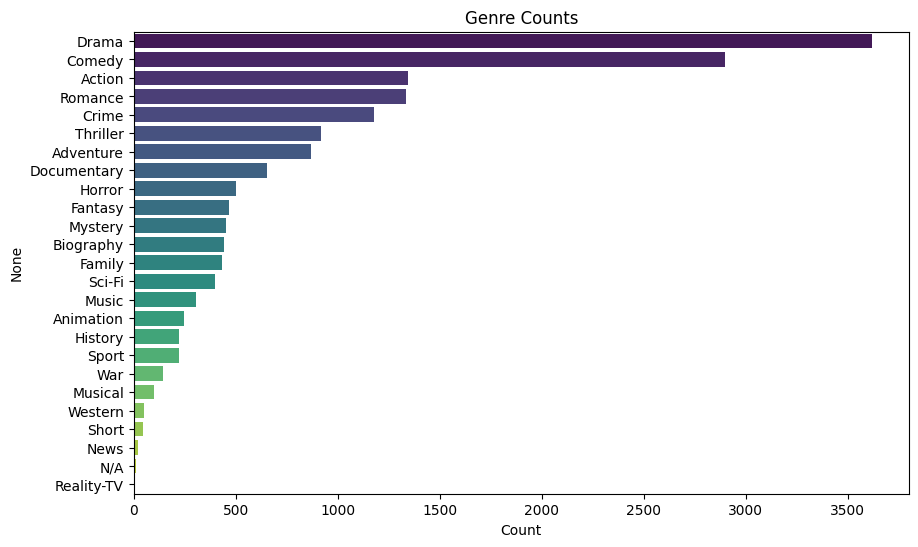

In [8]:
#barchart
genre_counts = data.drop(columns=["Id", "Genre"]).sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.xlabel('Count')
plt.title('Genre Counts')
plt.show()

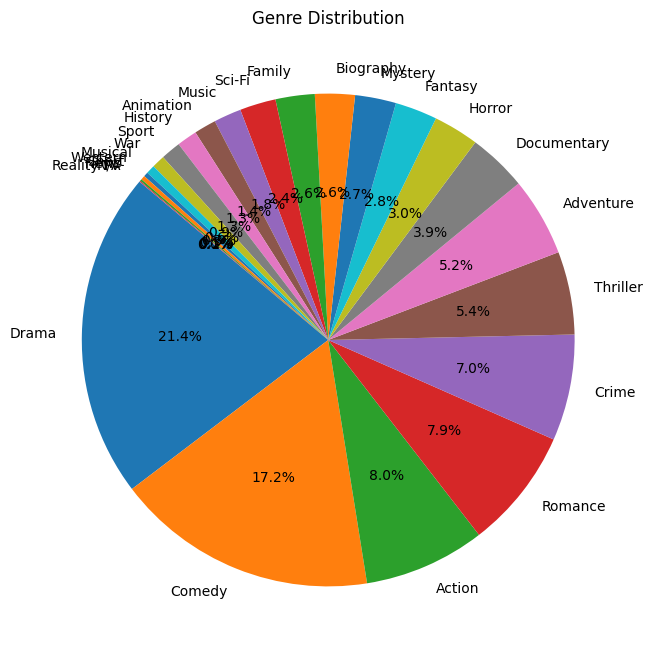

In [9]:
#piechart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution')
plt.show()

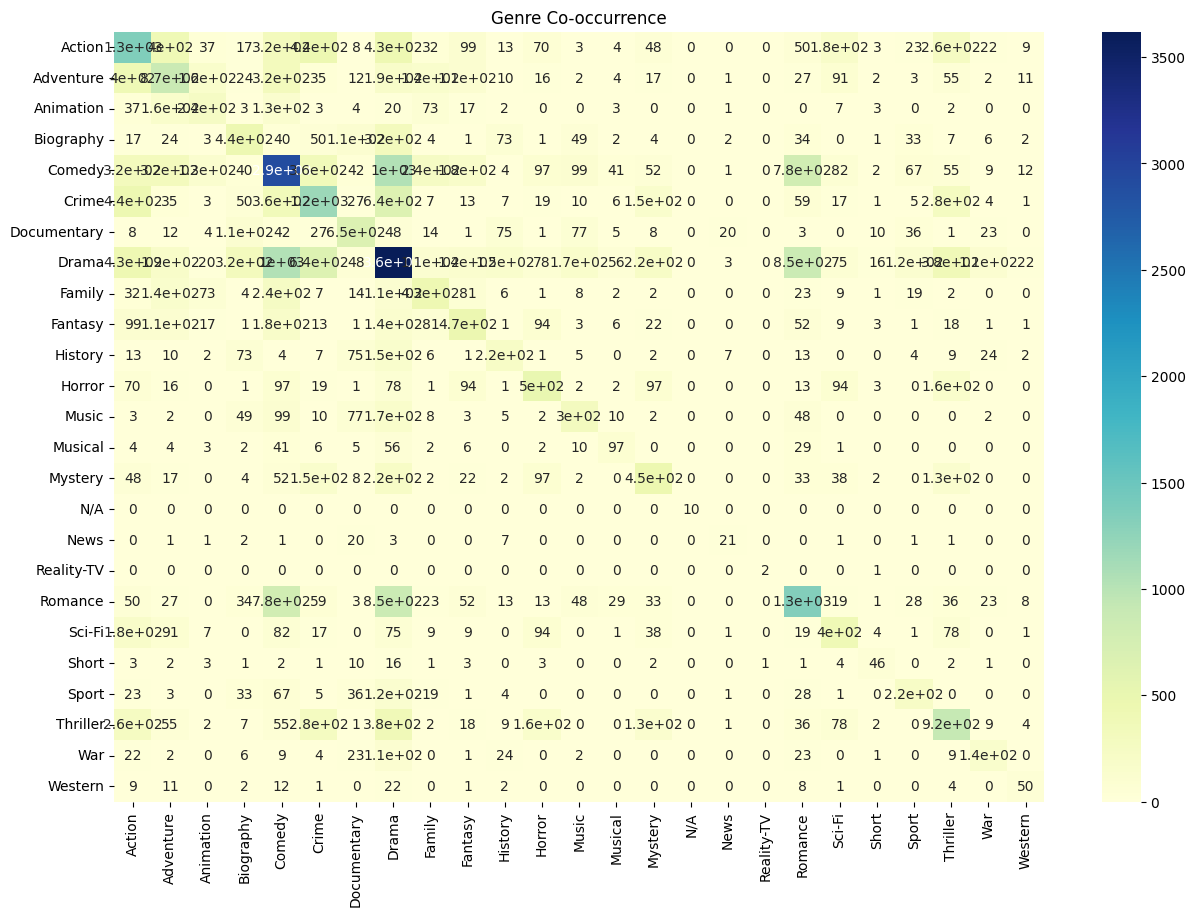

In [10]:
#Correlation
plt.figure(figsize=(15, 10))
genre_cooccurrence = data.drop(columns=["Id", "Genre"]).T.dot(data.drop(columns=["Id", "Genre"]))
sns.heatmap(genre_cooccurrence, annot=True, cmap="YlGnBu")
plt.title('Genre Co-occurrence')
plt.show()

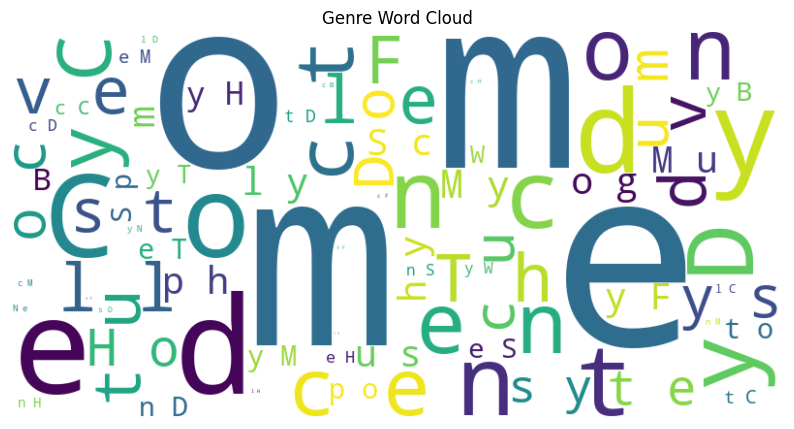

In [11]:
#wordcloud
genre_text = ' '.join(data['Genre'].sum())
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(genre_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()

c:\Python312\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


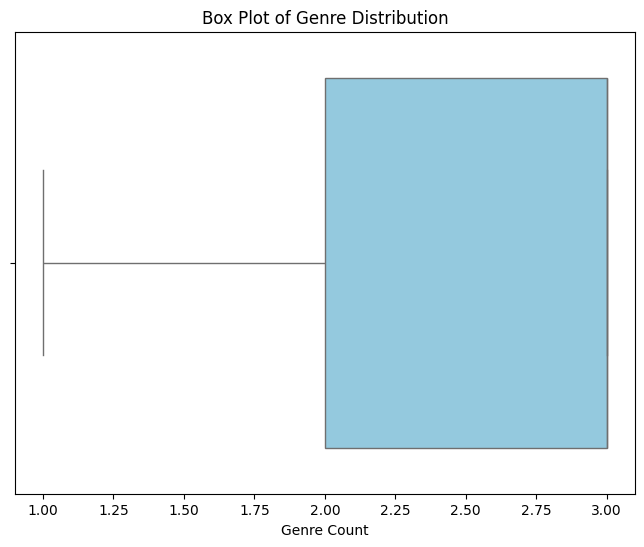

In [12]:
#boxplot
genre_counts = data.drop(columns=["Id", "Genre"]).sum(axis=1)
plt.figure(figsize=(8, 6))
sns.boxplot(x=genre_counts, orient='v', color='skyblue')
plt.xlabel('Genre Count')
plt.title('Box Plot of Genre Distribution')
plt.show()

# OUTLIERSS

In [10]:
#outliers -> uncomment this for outliers for each genre , have commented it out because our data is in 1 and 0 , and the outliers isnt making much sense
#numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
#for column in numeric_columns:
#    plt.figure(figsize=(8, 6))
#    sns.boxplot(x=data[column], orient='v', color='skyblue')
#    plt.xlabel(column)
#    plt.title('Box Plot of ' + column)
#    plt.show()

# Loader Function

In [15]:
width = 340
height = 340
X = []
for i in tqdm(range(data.shape[0])):
  #D:\PythonProj\RafayAI\RAFAY\archive (4)\Multi_Label_dataset\Images\tt0084058.jpg
  path = 'D:/PythonProj/RafayAI/RAFAY/archive (4)/Multi_Label_dataset/Images/'+data['Id'][i]+'.jpg'
  img = image.load_img(path,target_size=(width,height,3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [01:03<00:00, 115.00it/s]


# Dropping Cols for consistency - also see shape in here

In [16]:
y = data.drop(['Id','Genre'],axis=1)
y = y.to_numpy()
y.shape    #dimensionality

(7254, 25)

# Training The Model (80 20 split)

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Model Desiging

In [18]:
model = Sequential()
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(25,activation='sigmoid'))

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


![Image](https://www.researchgate.net/publication/344294512/figure/fig1/AS:936958935191552@1600399826350/A-generic-CNN-Architecture.png)

# Model

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 338, 338, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 338, 338, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 169, 169, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 169, 169, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 167, 167, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 167, 167, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 83, 83, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 83, 83, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 81, 81, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 81, 81, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 102400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    13,107,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,135,097 (50.11 MB)

 Trainable params: 13,134,617 (50.10 MB)

 Non-trainable params: 480 (1.88 KB)

# Model Compiling

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Fitting Model

In [21]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 475s 3s/step - accuracy: 0.1081 - loss: 0.7196 - val_accuracy: 0.0055 - val_loss: 3.3464
Epoch 2/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.3019 - loss: 0.2654 - val_accuracy: 0.1420 - val_loss: 1.3310
Epoch 3/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.3290 - loss: 0.2403 - val_accuracy: 0.1620 - val_loss: 1.0524
Epoch 4/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step - accuracy: 0.3349 - loss: 0.2322 - val_accuracy: 0.1854 - val_loss: 1.3248
Epoch 5/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 366s 2s/step - accuracy: 0.3695 - loss: 0.2145 - val_accuracy: 0.1971 - val_loss: 0.5314


# Evaluating Results

In [35]:
score = model.evaluate(X_test, y_test, verbose = 0 )
print("Accuracy: ", score[1])

Accuracy:  0.83477474676


# Checking Results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Drama
Comedy
Romance


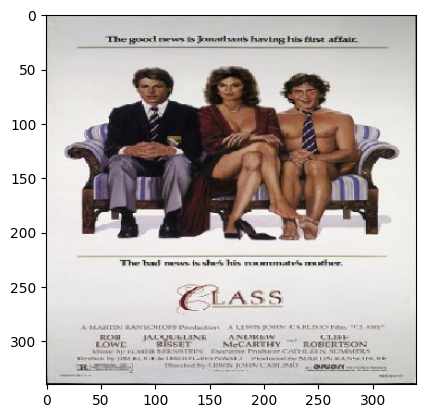

In [27]:
#tt0085346
#tt0085382
#tt0086877
img = image.load_img('D:/PythonProj/RafayAI/RAFAY/archive (4)/Multi_Label_dataset/Images/tt0085346.jpg',target_size=(width,height,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,width,height,3)
classes = data.columns[2:]
y_pred = model.predict(img)
top3=np.argsort(y_pred[0])[:-4:-1]
for i in range(3):
  print(classes[top3[i]])

# New

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, silhouette_score

In [29]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.DataFrame(data)

# Prepare features and target
X = df.drop(['Id', 'Genre'], axis=1)
y = df['Genre'].apply(lambda x: 'Drama' in x).astype(int)  # Binary classification: 1 if Drama is in Genre, else 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Model Implementation
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Classification Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Classification Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Classification Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[749   0]
 [  0 702]]
